Clonar repositorio desde GitHub

In [351]:
!git clone https://github.com/felipeediez/proyecto_3.git
%cd /content/proyecto_3/proyecto_3.ipynb

fatal: destination path 'proyecto_3' already exists and is not an empty directory.
[Errno 20] Not a directory: '/content/proyecto_3/proyecto_3.ipynb'
/content


Importar librerias necesarias para la realización del proyecto.

In [352]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

Data Set 1: Uruguay


*   Región: Uruguay
*   Categoría de dominio: Demografía
*   Nombre: "Nacimientos y defunciones por año y sexo"


In [353]:
archivo_1= '/content/proyecto_3/defuncynacim uru.csv'
df_uru = pd.read_csv (archivo_1, header= None)
df_uru.head()

,0
0,"ANIO,""SEXO"",""DEFUNCIONES"",""NACIMIENTOS"""
1,"1940,""F"",4582,7031"
2,"1940,""M"",5467,7328"
3,"1941,""F"",4527,6989"
4,"1941,""M"",5351,7266"


Organizando el DataFrame

*   Nombres de columnas
*   Separacion de datos por columnas
*   Eliminación de comillas

In [354]:
column_names = ['Año', 'Sexo', 'Defunciones', 'Nacimientos']  # Nombres de columnas
df_uru = df_uru.iloc[1:, 0].str.split(',', expand=True)  # Divide los datos en listas a partir de la segunda fila y la primer columna del df usando split y la coma como separador. Expand hace que cada elemento de las listas se coloque en una columna separada.
df_uru.columns = column_names  # Asigna los nombres de las columnas al DataFrame
df_uru['Sexo'] = df_uru['Sexo'].str.strip('"')  # Eliminar comillas dentro de columna 'Sexo'
df_uru  # Mostramos el DataFrame

,Año,Sexo,Defunciones,Nacimientos
1,1940,F,4582,7031
2,1940,M,5467,7328
3,1941,F,4527,6989
4,1941,M,5351,7266
5,1942,F,4617,7599
...,...,...,...,...
142,2010,M,8305,12937
143,2011,F,8684,11847
144,2011,M,8266,12774
145,2012,F,7838,7902


Data Set 2: CABA


*   Región: Ciudad Autónoma de Buenos Aires, Argentina
*   Categoría de dominio: Demografía
*   Nombre: "Nacimientos  inscriptos a término por sexo según año de inscripción. Ciudad de Buenos Aires. Años 1979/2022"

In [355]:
archivo_2 = '/content/proyecto_3/nacimientos-sexo-caba.xlsx'
df_nacimientos = pd.read_excel (archivo_2, header = None)
df_nacimientos.head()

,0,1,2,3
0,Nacimientos inscriptos a término por sexo seg...,NaN,NaN,NaN
1,Año,Total,Varón,Mujer
2,1979,46467,23751,22716
3,1980,44100,22620,21480
4,1981,43070,22174,20896


Organización del Data Frame


*   Especificación de que fila a que fila va el DF
*   Seteamos nombres de columnas



In [356]:
df_nacimientos = df_nacimientos.iloc [2:-2]  # Especificamos de donde a donde va el DataFrame
column_names = ['Año', 'Total', 'Varón', 'Mujer']  # Nombres de columnas
df_nacimientos.columns = column_names  # Asigna los nombres de las columnas al DataFrame
df_nacimientos.head()

,Año,Total,Varón,Mujer
2,1979,46467,23751,22716
3,1980,44100,22620,21480
4,1981,43070,22174,20896
5,1982,41031,20845,20186
6,1983,41046,21209,19837


Data Set 3: CABA


*   Región: Ciudad Autónoma de Buenos Aires, Argentina
*   Categoría de dominio: Demografía
*   Nombre: "Defunciones totales inscriptas a término por sexo según año de inscripción. Ciudad de Buenos Aires. Años 1991/2022"

In [357]:
archivo_3 = '/content/proyecto_3/defunciones-x-año-sexo-arg.xlsx'
df_defunciones = pd.read_excel (archivo_3, header = None)

Organización del Data Frame


*   Especificación de que fila a que fila va el DF
*   Seteamos nombres de columnas
*   Borramos columna 4


In [358]:
df_defunciones = df_defunciones.iloc [1:-1]  # Especificamos de donde a donde va el DataFrame
df_defunciones.drop(df_defunciones.columns[4], axis=1, inplace=True)
df_defunciones.columns = df_defunciones.iloc [0]
df_defunciones = df_defunciones[1:]
df_defunciones.head()

<ipython-input-358-e30c76628d4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defunciones.drop(df_defunciones.columns[4], axis=1, inplace=True)


1,Año,Total,Varón,Mujer
2,1991,35080,17159,17898
3,1992,35592,17476,18095
4,1993,35652,17448,18178
5,1994,33347,16511,16832
6,1995,34453,16838,17603


**Pregunta: ¿Cómo ha variado la proporción de nacimientos según defunciones totales y por sexo en Uruguay y la Ciudad de Buenos Aires en el período 2003-2012?**

Primero, separamos los años correspondientes con el periodo dado en la pregunta en todos los Data Frames a trabajar.


*   Empezamos con el Data Frame que contiene la información de Uruguay.



In [359]:
# Asegúrate de que la columna 'Año' sea de tipo numérico (int)
df_uru['Año'] = pd.to_numeric(df_uru['Año'])

# Luego, puedes filtrar las filas por el rango de años
df_uru = df_uru[df_uru['Año'] >= 2003]
df_uru

,Año,Sexo,Defunciones,Nacimientos
127,2003,F,8364,13017
128,2003,M,8436,13868
129,2004,F,8235,12613
130,2004,M,8426,13739
131,2005,F,8569,12099
132,2005,M,8438,13156
133,2006,F,8190,12478
134,2006,M,8106,13263
135,2007,F,8680,12015
136,2007,M,8881,13266


Seguimos con el Data Frame que contiene los nacimientos en Argentina en el período indicado.

In [360]:
df_nacimientos = df_nacimientos[df_nacimientos['Año'] >= 2003]
df_nacimientos = df_nacimientos [df_nacimientos['Año'] <= 2012]
df_nacimientos = df_nacimientos.reset_index(drop=True)

df_nacimientos

,Año,Total,Varón,Mujer
0,2003,42136,21795,20329
1,2004,44019,22426,21592
2,2005,43064,22122,20942
3,2006,43582,22231,21351
4,2007,42183,21860,20323
5,2008,45122,23149,21972
6,2009,43584,22161,21423
7,2010,44347,22842,21505
8,2011,44257,22557,21700
9,2012,42706,21831,20875


Y terminamos con el Data Frame que contiene las defunciones de Argentinos en el período indicado

In [361]:
df_defunciones = df_defunciones[df_defunciones['Año'] >= 2003]
df_defunciones = df_defunciones [df_defunciones['Año'] <= 2012]
df_defunciones = df_defunciones.reset_index(drop=True)

df_defunciones

1,Año,Total,Varón,Mujer
0,2003,33197,15304,17893
1,2004,32613,14947,17666
2,2005,31792,14402,17390
3,2006,30751,13805,16946
4,2007,32164,14432,17732
5,2008,29826,13421,16405
6,2009,29112,13331,15780
7,2010,30536,13316,17217
8,2011,29531,13156,16375
9,2012,29200,13068,16132


1. Proporción de nacimientos según defunciones en Uruguay




In [363]:
grupo_uru = df_uru.groupby(['Año', 'Sexo']).sum()  # Agrupa los columnas en el DataFrame 'df_uru' por las columnas 'Año' y 'Sexo' y luego suma los valores de nacimientos y defunciones para cada grupo.

  # Pasamos los datos en las columnas 'Nacimientos' y 'Defunciones' a tipo numérico
df_uru['Nacimientos'] = pd.to_numeric(df_uru['Nacimientos'])
df_uru['Defunciones'] = pd.to_numeric(df_uru['Defunciones'])

grupo_uru['Proporcion_Nacimientos'] = grupo_uru['Nacimientos'] / grupo_uru['Defunciones']  # Se calcula la proporción de nacimientos con respecto a las defunciones para cada año y sexo y agrega una nueva columna llamada 'Proporcion_Nacimientos' al DataFrame grupo_uru.
grupo_uru.reset_index(inplace=True)  # Se desagrupa el DataFrame y se vuelve al formato columnas del DataFrame 'df_uru'

# Separa los datos de mujeres y hombres
data_mujeres = grupo_uru[grupo_uru['Sexo'] == 'F']
data_hombres = grupo_uru[grupo_uru['Sexo'] == 'M']
grupo_uru

<ipython-input-363-0857e17db7df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uru['Nacimientos'] = pd.to_numeric(df_uru['Nacimientos'])
<ipython-input-363-0857e17db7df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uru['Defunciones'] = pd.to_numeric(df_uru['Defunciones'])


,Año,Sexo,Defunciones,Nacimientos,Proporcion_Nacimientos
0,2003,F,8364,13017,1.556313
1,2003,M,8436,13868,1.643907
2,2004,F,8235,12613,1.531633
3,2004,M,8426,13739,1.630548
4,2005,F,8569,12099,1.411950
5,2005,M,8438,13156,1.559137
6,2006,F,8190,12478,1.523565
7,2006,M,8106,13263,1.636195
8,2007,F,8680,12015,1.384217
9,2007,M,8881,13266,1.493751


Se crea gráfica que refleje la proporción de nacimientos según defunciones. Una línea para los Hombres y otra para las Mujeres.

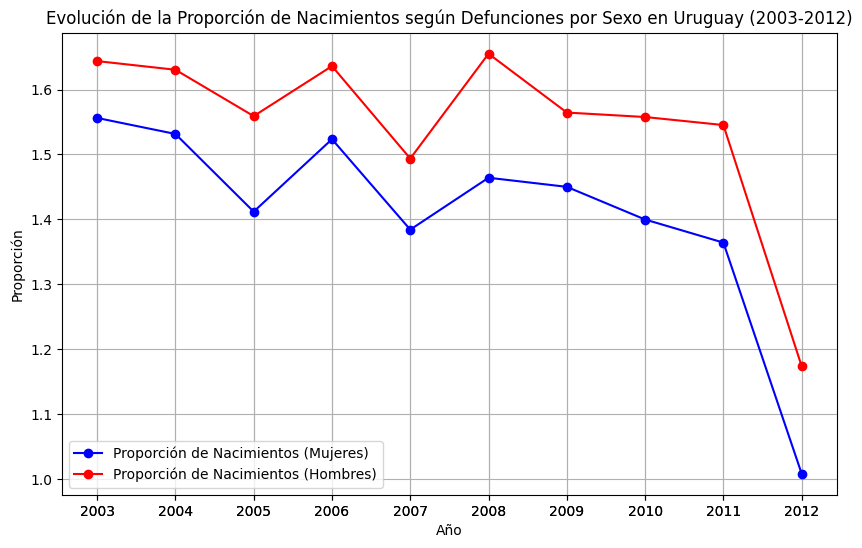

In [229]:
# Crea la gráfica de líneas para la proporción de nacimientos en mujeres y hombres
plt.figure(figsize=(10, 6))
plt.plot(data_mujeres['Año'], data_mujeres['Proporcion_Nacimientos'], label='Proporción de Nacimientos (Mujeres)', marker='o', linestyle='-', color='b')
plt.plot(data_hombres['Año'], data_hombres['Proporcion_Nacimientos'], label='Proporción de Nacimientos (Hombres)', marker='o', linestyle='-', color='r')

# Etiquetas y detalles del gráfico
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.title('Evolución de la Proporción de Nacimientos según Defunciones por Sexo en Uruguay (2003-2012)')
plt.xticks(grupo_uru['Año'])
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()

La proporción de nacimientos con respecto a las defunciones es una medida que indica la relación entre la cantidad de nacimientos y la cantidad de defunciones en un determinado período. La interpretación de esta proporción puede proporcionar información sobre la dinámica demográfica de una población en ese período.

- Si la proporción **es mayor que 1**, significa que hay más nacimientos que defunciones en ese período, lo que generalmente indica un crecimiento de la población.

- Si la proporción **es igual a 1**, significa que el número de nacimientos es igual al número de defunciones en ese período, lo que sugiere que la población se mantiene estable.

- Si la proporción **es menor que 1**, significa que hay más defunciones que nacimientos en ese período, lo que podría indicar una disminución de la población o un envejecimiento de la población.

**Análisis:**
Durante el período de 2003 a 2012 en Uruguay, la proporción de nacimientos con respecto a las defunciones siempre superó el valor de 1. Esto sugiere que hubo un mayor número de nacimientos que de defunciones en cada uno de esos años, lo que indica un crecimiento de la población durante ese período. Por otro lado, se puede observar cómo esta proporción de nacimientos según defunciones muestra una mayor proporción para hombres que para mujeres. Esto podría sugerir que, en el período 2003-2012 en Uruguay, la población masculina experimentó un crecimiento relativo mayor en comparación con la población femenina. Este resultado puede ser un indicador positivo de la salud y el bienestar de la población uruguaya en ese lapso de tiempo.


2. Proporción de nacimientos según defunciones en Argentina.


In [317]:
  # Pasamos las columnas 'Varón' y 'Mujer' en el DataFrame de Nacimientos a tipo numérico.
df_nacimientos['Varón'] = pd.to_numeric(df_nacimientos['Varón'])
df_nacimientos['Mujer'] = pd.to_numeric(df_nacimientos['Mujer'])

  # Pasamos las columnas 'Varón' y 'Mujer' en el DataFrame de Defunciones a tipo numérico.
df_defunciones['Varón'] = pd.to_numeric(df_defunciones['Varón'])
df_defunciones['Mujer'] = pd.to_numeric(df_defunciones['Mujer'])


In [ ]:
proportion_men = df_nacimientos['Varón'] / df_defunciones['Varón']  # Proporción de hombres
proportion_women = df_nacimientos['Mujer'] / df_defunciones['Mujer']  # Proporción de mujeres

df_nacimientos['Proporción_Nacimientos_Varón'] = proportion_men
df_nacimientos['Proporción_Nacimientos_Mujer'] = proportion_women

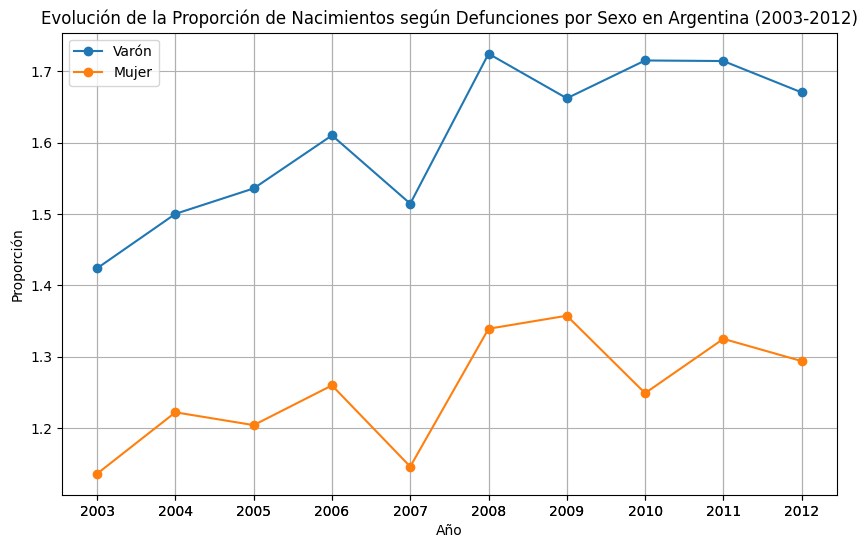

In [332]:
# Crea la gráfica de línea
plt.figure(figsize=(10, 6))
plt.plot(df_nacimientos['Año'], df_nacimientos['Proporción_Nacimientos_Varón'], label='Varón', marker='o')
plt.plot(df_nacimientos['Año'], df_nacimientos['Proporción_Nacimientos_Mujer'], label='Mujer', marker='o')

# Personaliza la gráfica
plt.title('Evolución de la Proporción de Nacimientos según Defunciones por Sexo en Argentina (2003-2012)')
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.xticks(grupo_uru['Año'])
plt.legend()
plt.grid(True)

# Muestra la gráfica
plt.show()

**Análisis:**
Durante el período de 2003 a 2012 en la Ciudad de Buenos Aires, la proporción de nacimientos con respecto a las defunciones siempre superó el valor de 1, lo que sugiere un crecimiento de la población en ese lapso. Sin embargo, es interesante notar que esta proporción es más pronunciada para los hombres en comparación con las mujeres y esta brecha es significativamente mayor que la que se observa en Uruguay. Este fenómeno podría indicar diferencias en la dinámica de la población entre hombres y mujeres en la Ciudad de Buenos Aires durante ese período, con una mayor tasa de natalidad en comparación con la tasa de mortalidad, especialmente entre la población masculina.

3. Comparacion de la proporción de natalidad segun defunciones en Uruguay - Buenos Aires en el período 2003 - 2012


Obtenemos la proporción total de natalidad segun las defunciones en Uruguay

In [338]:
grupo_uru = grupo_uru.groupby('Año').sum().reset_index()

# Total de nacimientos (hombres y mujeres) por año
total_nacimientos = grupo_uru[['Año', 'Nacimientos']]

# Total de defunciones (hombres y mujeres) por año
total_defunciones = grupo_uru[['Año', 'Defunciones']]

# Divide el total de nacimientos entre el total de defunciones por año
proporcion_nacimientos_defunciones = total_nacimientos['Nacimientos'] / total_defunciones['Defunciones']

# Crea un nuevo DataFrame con la proporción por año
proporcion_df_uru = pd.DataFrame({'Año': total_nacimientos['Año'], 'Proporción': proporcion_nacimientos_defunciones})

proporcion_df_uru

,Año,Proporción
0,2003,1.600298
1,2004,1.581658
2,2005,1.484977
3,2006,1.579590
4,2007,1.439611
5,2008,1.559123
6,2009,1.508295
7,2010,1.477105
8,2011,1.452566
9,2012,1.087324


Obtenemos la proporción total de natalidad segun las defunciones en la Ciudad de Buenos Aires

In [339]:
# Suma los nacimientos de hombres y mujeres para obtener el total de nacimientos por año
total_nacimientos = df_nacimientos['Varón'] + df_nacimientos['Mujer']
total_defunciones = df_defunciones['Varón'] + df_defunciones['Mujer']

# Divide el total de nacimientos entre las defunciones para obtener la proporción total por año
proporcion_total = total_nacimientos / total_defunciones

# Crea un nuevo DataFrame con la proporción total por año
proporcion_df_caba = pd.DataFrame({'Año': df_nacimientos['Año'], 'Proporción_Total': proporcion_total})

proporcion_df_caba

,Año,Proporción_Total
0,2003,1.26891
1,2004,1.349707
2,2005,1.354555
3,2006,1.417255
4,2007,1.311497
5,2008,1.512808
6,2009,1.497166
7,2010,1.452429
8,2011,1.498662
9,2012,1.462534


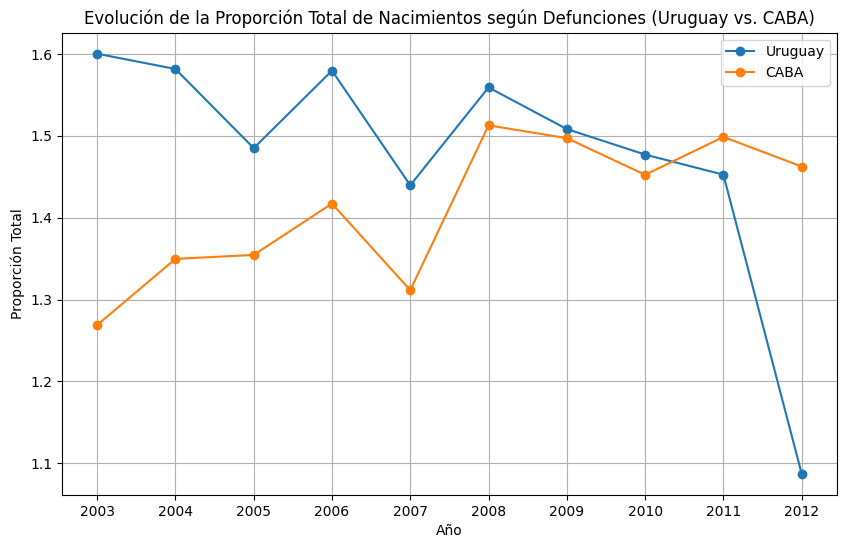

In [347]:
plt.figure(figsize=(10, 6))

# Grafica la proporción total de nacimientos en Uruguay
plt.plot(proporcion_df_uru['Año'], proporcion_df_uru['Proporción'], label='Uruguay', marker='o')

# Grafica la proporción total de nacimientos en CABA
plt.plot(proporcion_df_caba['Año'], proporcion_df_caba['Proporción_Total'], label='CABA', marker='o')

# Personaliza la gráfica
plt.title('Evolución de la Proporción Total de Nacimientos según Defunciones (Uruguay vs. CABA)')
plt.xlabel('Año')
plt.xticks(grupo_uru['Año'])
plt.ylabel('Proporción Total')
plt.legend()
plt.grid(True)

plt.show()

**Conclusiones:**


* Como conclusión, observando la gráfica final que suma los valores de nacimientos y defunciones por año de hombres y mujeres en Uruguay y en la Ciudad de Buenos Aires, se puede decir que hasta el año 2011, la proporción de natalidad según defunciones muestra a Uruguay con una proporción  mayor que la de CABA. Al comienzo de la gráfica la brecha es mas grande y se va achicando, hasta 2011 que esto se invierte y CABA pasa a tener una mayor proporcion de natalidad según defunciones. Luego en 2012 la proporción de Uruguay se desploma y la de CABA incrementa significativamente, lo que podría deberse a múltiples factores demográficos y de salud. Puede reflejar cambios en las tasas de natalidad y mortalidad en ambas regiones. Por ejemplo, podría indicar mejoras en la atención médica y la calidad de vida en CABA, lo que ha llevado a una disminución en las tasas de mortalidad.
*  Este cambio demográfico sugiere que las dinámicas de población en ambas regiones evolucionaron de manera diferente. En CABA, la población podría haber experimentado un crecimiento sostenido, mientras que en Uruguay el ritmo de crecimiento podría haberse estancado.